In [43]:
import Pkg; Pkg.activate("../"); # Activate the project 

  Activating project at `~/Documents/Research/MonitoringMetrology/QuTaM.jl`


# Driven Qubit
The system of interest has hamiltonian:

$$ H = \frac{\Delta}{2} \sigma_z + \Omega \sigma_x$$

and jump operators

$$ L_1 = \gamma(\bar{N} +1 )\sigma_- $$
$$ L_2 = \gamma\bar{N}\sigma_- $$

For $\Omega=0$ the master equation has a steady state that's diagonal in the computational basis and $\langle\sigma_z\rangle = \frac{-1}{2\bar{N}+1}$

In [156]:
using LinearAlgebra, QuTaM, Plots, LaTeXStrings

In [45]:
########################## INITIALIZATION
# Define the hamiltonian
delta = 0 # Constant following Landi figure 7
gamma = 1
omega = gamma
nbar = 0.2
H = 0.5*delta * QuTaM.sigma_z + omega*QuTaM.sigma_x
# Define the jump operators
L1 = gamma*(nbar+1)*QuTaM.sigma_m
L2 = gamma*(nbar)*QuTaM.sigma_p
# Define the system
psi0 = zeros(ComplexF64, 2)
psi0[2] = 1
sys = System(H, [L1, L2])
params = SimulParameters(psi0,
    14.0, # Final time. Set very long so that all trajectories jump
    1, # seed
    100, # Number of trajectories
    75_000, # Number of samples in the finegrid
    1.0, # Multiplier to use in the fine grid
    1e-3 # Tolerance for passing Dark state test
)

SimulParameters(psi0=ComplexF64[0.0 + 0.0im, 1.0 + 0.0im]
nsamples=75000
seed=1
ntraj=100)
multiplier=1.0
tf=14.0
dt=0.00018666666666666666
eps=0.001)

In [46]:
# Generate trajectories
sample_clicks = run_trajectories(sys, params);

Excitation at t=10.570514273523647

Excitation at t=5.909572127628368



Sampling...   9%|███▋                                    |  ETA: 0:00:11

Excitation at t=9.33793783917119

Excitation at t=10.835397805304073

Excitation at t=2.146695289270524

Excitation at t=5.489006520086935



Sampling...  16%|██████▍                                 |  ETA: 0:00:11

Excitation at t=8.950226003013375

Excitation at t=11.874211656155417

Excitation at t=1.3428979053054042

Excitation at t=7.001213349511327



Sampling...  23%|█████████▎                              |  ETA: 0:00:11

Excitation at t=2.4265123534980466

Excitation at t=4.517580234403126

Excitation at t=5.923198975986347

Excitation at t=6.746223282977107

Excitation at t=8.402352031360419



Sampling...  30%|████████████                            |  ETA: 0:00:10

Excitation at t=9.99221322950973

Excitation at t=12.584674462326166

Excitation at t=5.167188895851945

Excitation at t=6.981239749863332



Sampling...  37%|██████████████▊                         |  ETA: 0:00:09

Excitation at t=0.5445139268523582

Excitation at t=12.285257136761823



Sampling...  45%|██████████████████                      |  ETA: 0:00:08

Excitation at t=6.510460139468526

Excitation at t=3.1664688862518178



Sampling...  52%|████████████████████▊                   |  ETA: 0:00:07

Excitation at t=11.693142575234338

Excitation at t=13.372418298910654

Excitation at t=0.9615328204376061



Sampling...  59%|███████████████████████▋                |  ETA: 0:00:06

Excitation at t=7.144761930159069

Excitation at t=5.036707156095415



Sampling...  66%|██████████████████████████▍             |  ETA: 0:00:05

Excitation at t=7.250790010533475

Excitation at t=3.8722649635328477

Excitation at t=12.23130975079668

Excitation at t=5.365991546553954

Excitation at t=11.757730103068043

Excitation at t=13.235963146175287



Sampling...  74%|█████████████████████████████▋          |  ETA: 0:00:04

Excitation at t=7.3878051707356125

Excitation at t=8.127015026867028

Excitation at t=11.148628648381983



Sampling...  80%|████████████████████████████████        |  ETA: 0:00:03

Excitation at t=15.61954159388792



Sampling...  87%|██████████████████████████████████▊     |  ETA: 0:00:02

Excitation at t=3.449459326124349

Excitation at t=9.700822677635703



Sampling...  94%|█████████████████████████████████████▋  |  ETA: 0:00:01

Excitation at t=1.403938719182923



Sampling... 100%|████████████████████████████████████████| Time: 0:00:14


In [49]:
sample_clicks[3]

10-element Vector{DetectionClick}:
 DetectionClick(2.9517993573247643, 1)
 DetectionClick(1.7798903985386472, 1)
 DetectionClick(1.261696822624302, 1)
 DetectionClick(0.8919052254030057, 1)
 DetectionClick(1.5043667248896653, 1)
 DetectionClick(1.1666822224296327, 1)
 DetectionClick(0.693289243856585, 1)
 DetectionClick(0.32088427845704637, 2)
 DetectionClick(2.583501113348178, 1)
 DetectionClick(0.9051587354498063, 1)

In [50]:
# Obtain states between jumps
ntimes = 500
t = collect(LinRange(0, params.tf, ntimes))
sample_states = zeros(ComplexF64, ntimes, sys.NLEVELS, params.ntraj)
for k in 1:params.ntraj
    states_k = evaluate_at_t(t, sample_clicks[k], sys, psi0)
    for j in 1:sys.NLEVELS 
        for tn in 1:ntimes 
            sample_states[tn, j, k] = states_k[tn, j]
        end 
    end 
end 

In [51]:
# Evaluate the occupation number of the excited state
sample_occupation_e = zeros(Float64, ntimes,  params.ntraj)
number_op = QuTaM.sigma_p * QuTaM.sigma_m
for k in 1:params.ntraj
    for tn in 1:ntimes 
        sample_occupation_e[tn, k] = dot(sample_states[tn, :, k], number_op * sample_states[tn, :, k])
    end 
end 

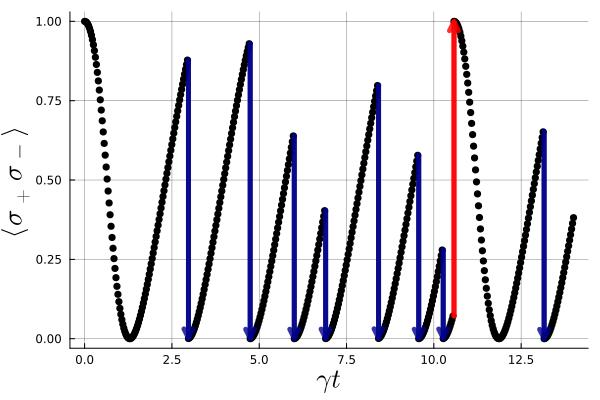

In [177]:
######################## Plot
traj_index = 3
waiting_times = [click.time for click in sample_clicks[traj_index]] 
jump_times = cumsum(waiting_times)
times = Array{Float64}
jump_indeces = []
jump_labels = []
counter = 1
# Find the indices of the jumps
for t_jump in jump_times
    while (t[counter] < t_jump) && (counter < size(t)[1])
        counter = counter + 1
    end  
    if counter == size(t)[1]
        break
    end 
    push!(jump_indeces, counter)
end 

# Plot
p = scatter(t, sample_occupation_e[:, traj_index], legend=false, linewidth=10, color="black",
            xlabel = L"\gamma t", guidefont=font(18), grid=:true, gridalpha = 0.5, 
            ylabel = L"\langle\sigma_+\sigma_-\rangle")
# Add jump indicators
for j in jump_indeces
    if sample_occupation_e[j-1, traj_index] > sample_occupation_e[j+1, traj_index]
        plot!([t[j], t[j]], [sample_occupation_e[j-1, traj_index], sample_occupation_e[j+1, traj_index]],
              linewidth=5, alpha=0.8, color="darkblue", 
              arrow=:true, arrowsize=49)
    elseif sample_occupation_e[j-1, traj_index] < sample_occupation_e[j+0, traj_index]
        plot!([t[j], t[j]], [sample_occupation_e[j-1, traj_index], sample_occupation_e[j+1, traj_index]],
              linewidth=5, alpha=0.8, color="red", 
              arrow=:true, arrowsize=49)
    end 
end 
p